About the Dataset:
The dataset is downloaded from UCI (Online Retail)
The dataset is composed of 8 attributes and 541909 instances.
The rows (instances) show all transactions occurring between 01/12/2010 and 09/12/2011 for a UK based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Attribute Information:

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

3. Description: Product (item) name. Nominal. 

4. Quantity: The quantities of each product (item) per transaction. Numeric.

5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

6. UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

8. Country: Country name. Nominal, the name of the country where each customer resides.

Objective: To group the clients in customer segments by using K-Means Clustering Technique using the RFM (Recency, Frequency and Monetary Value) approach.

# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Loading the dataset:
df = pd.read_excel('Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

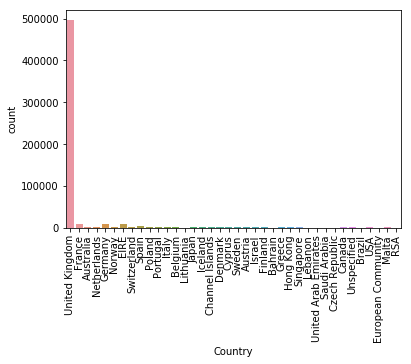

In [9]:
sns.countplot('Country', data = df)
plt.xticks(rotation=90)

In [10]:
len(df['Country'].unique())

38

In [11]:
(df.Country =='United Kingdom').sum()

495478

In [12]:
#Checking for empty values:
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [13]:
# Dropping the instances which have empty values for Customer ID:
df = df[pd.notnull(df['CustomerID'])]

In [14]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [15]:
df.shape

(406829, 8)

135080 (= 541909 - 406829) instances got dropped from the dataframe after this step. Also, the instances which had empty values in the Description attribute got removed.

In [16]:
# Checking for the number of unique values in the dataset:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [17]:
# Checking the statistical information already present in the dataset:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


The quantity column has negative number in the minimal value column. For our further analysis, we will drop the instances where Quantity < 0, as having negative values for Quantity attribute does not make much sense.

In [18]:
df = df[df.Quantity >= 0]

In [19]:
df.shape

(397924, 8)

8905 instances are dropped from the dataframe after this step

In [20]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [21]:
import seaborn as sns

In [22]:
# Checking the 'Country' attribute.

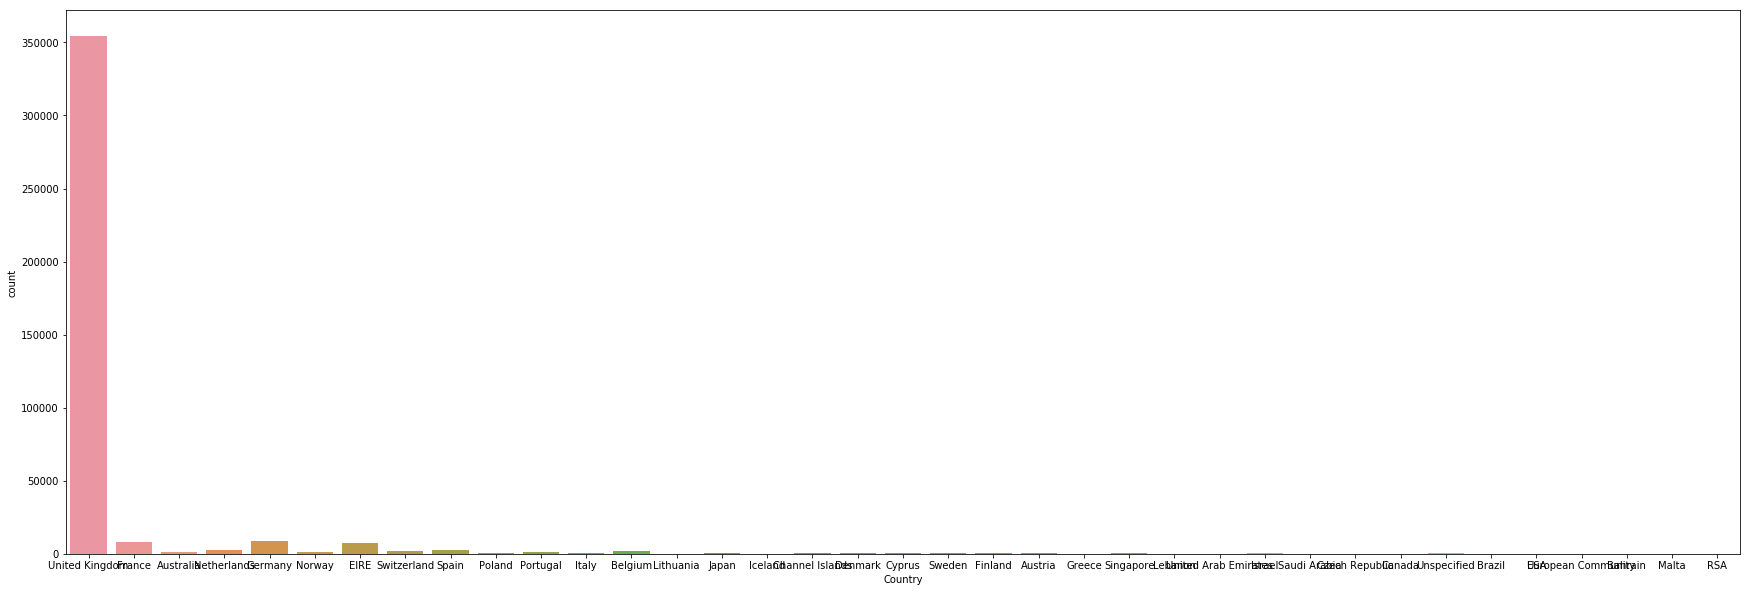

In [23]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x="Country", data=df)
plt.show()

From the countplot of Country attribute, we notice that the number of instances of 'United Kingdom' customers heavily outweigh those from any other country. Thus, we will only keep the instances with 'United Kingdom' as country in the 'Country' attribute.

In [24]:
# Removing Non-UK records as enough Geographic details about other countries/region is not available:
df = df[df.Country.isin(['United Kingdom'])]

In [25]:
df.shape

(354345, 8)

43579 instances are dropped from the dataframe after this operation

Checking for 'Invoices' attribute', we know from the attribute information provided that the Invoice Numbers starting with 'C' imply cancellation. Hence, these instances are also not relevant for the analysis and we need to drop these too.

In [26]:
df.InvoiceNo.str.startswith('C')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
46       NaN
47       NaN
48       NaN
49       NaN
          ..
541864   NaN
541865   NaN
541866   NaN
541867   NaN
541868   NaN
541869   NaN
541870   NaN
541871   NaN
541872   NaN
541873   NaN
541874   NaN
541875   NaN
541876   NaN
541877   NaN
541878   NaN
541879   NaN
541880   NaN
541881   NaN
541882   NaN
541883   NaN
541884   NaN
541885   NaN
541886   NaN
541887   NaN
541888   NaN
541889   NaN
541890   NaN
541891   NaN
541892   NaN
541893   NaN
Name: InvoiceNo, Length: 354345, dtype: float64

In [29]:
df = df[~df.InvoiceNo.str.startswith('C').fillna(False)]

At this stage, the data cleaning process is complete and we will move onto build a Customer Dataframe applying the RFM approach.

1. Recency (R) - The date of the last invoice is 2011-12-09, which we will consider as the most recent instance. We will subtract each date from this date to calculate the recency.

2. Frequency (F) - We need to sum the Invoice numbers for each Customer ID.

3. Monetary Value (M) - We need to multiply the Unit Price by Quantity and sum them up for each Customer ID.

In [30]:
import datetime as dt

In [31]:
print (df['InvoiceDate'].max())

2011-12-09 12:49:00


In [33]:
lastdate = dt.datetime (2011,12,10)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [36]:
df['TotalPrice'] = df.UnitPrice * df.Quantity

In [37]:
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (lastdate - x.max()).days,
                                         'InvoiceNo': lambda x: len(x),
                                         'TotalPrice': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [38]:
rfmTable

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
12821.0,214,6,92.72
12822.0,70,46,948.88
12823.0,74,5,1759.50
12824.0,59,25,397.12


In [39]:
rfmTable.describe()

,recency,frequency,monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.040000
50%,50.000000,41.000000,651.820000
75%,142.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


Now, we will assign a score for each dimension on a scale of 1 to 5 in the following way:

1. Order the data by frequency in descending mode.
2. Divide the number of customers in the dataset by 5.
3. Assign a number from 5 to 1 to each one of the created segments.
4. For Recency attribute, the data needs to be sorted in ascending mode as the most recent orders are better.

In [43]:
# Create f_score, m_score and r_score

f_score = []
m_score = []
r_score = []

columns = ['frequency', 'monetary']
scores_str = ['f_score', 'm_score']
scores = [f_score, m_score]

for n in range(len(columns)):
    # Order by column
    rfmTable = rfmTable.sort_values(columns[n], ascending=False)
    
    # Create new index
    refs = np.arange(1,3922)
    rfmTable['refs'] = refs
    
    # Add score
    for i, row in rfmTable.iterrows():
        if row['refs'] <= 784.4:
            scores[n].append(5)
        elif row['refs'] > 784.4 and row['refs'] <= 784.4*2:
            scores[n].append(4)
        elif row['refs'] > 784.4*2 and row['refs'] <= 784.4*3:
            scores[n].append(3)
        elif row['refs'] > 784.4*3 and row['refs'] <= 784.4*4:
            scores[n].append(2)
        else: 
            scores[n].append(1)

    # Create f_score column
    rfmTable[scores_str[n]] = scores[n]
    
# For recency, we do the opposite: most recents are better, so we order as ascending
rfmTable = rfmTable.sort_values('recency', ascending=True)
    
# Recreate index
refs = np.arange(1,3922)
rfmTable['refs'] = refs
    
# Add score
for i, row in rfmTable.iterrows():
    if row['refs'] <= 784.4:
        r_score.append(5)
    elif row['refs'] > 784.4 and row['refs'] <= 784.4*2:
        r_score.append(4)
    elif row['refs'] > 784.4*2 and row['refs'] <= 784.4*3:
        r_score.append(3)
    elif row['refs'] > 784.4*3 and row['refs'] <= 784.4*4:
        r_score.append(2)
    else: 
        r_score.append(1)

# Create r_score column
rfmTable['r_score'] = r_score
    
rfmTableScores = rfmTable.drop(['frequency', 'monetary', 'recency', 'refs'], axis=1)

rfmTableScores.head(5)

,f_score,m_score,r_score
CustomerID,,,
18102.0,5,5,5
14441.0,3,4,5
13777.0,5,5,5
17428.0,5,5,5
14051.0,5,5,5


Scaling of data is not needed after this.

Now, we will use the KMeans model to determine the number of clusters using within-cluster sums of squares.

In [44]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(rfmTableScores)
    wcss.append(kmeans.inertia_)

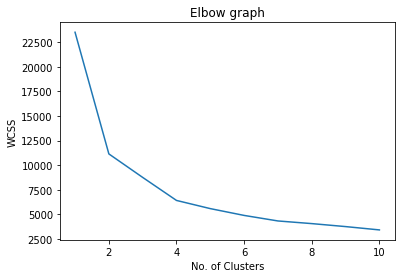

In [45]:
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

We can interpret from the Elbow Graph that the WCSS starts to slowly decrease after K = 4. We can choose this as the optimal number of clusters for building the model and further analysis.

In [46]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(rfmTableScores)

In [47]:
rfmTable['clusters'] = clusters
rfmTable.head()

,recency,frequency,monetary,refs,f_score,m_score,r_score,clusters
CustomerID,,,,,,,,
18102.0,0,431,259657.30,1,5,5,5,2
14441.0,0,51,1712.89,2,3,4,5,2
13777.0,0,197,25977.16,3,5,5,5,2
17428.0,0,328,17256.85,4,5,5,5,2
14051.0,0,210,15610.39,5,5,5,5,2


Text(0.5, 0, 'Monetary')

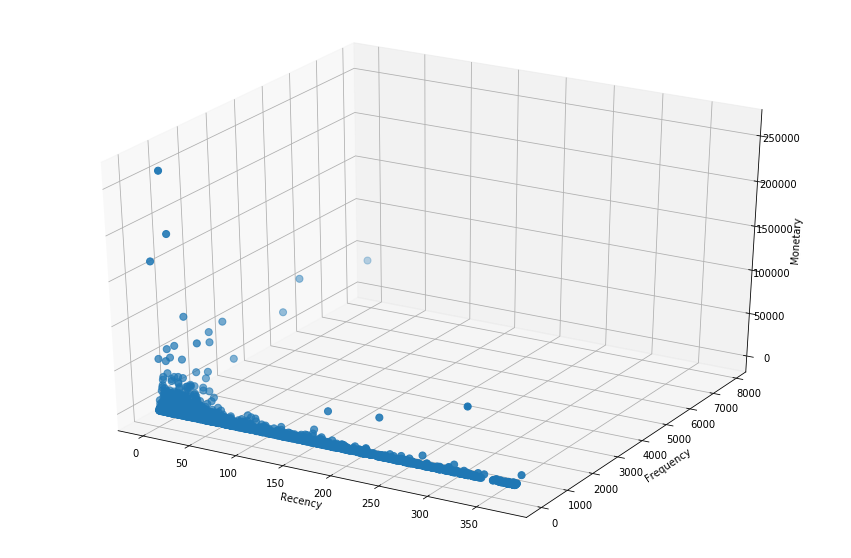

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfmTable.recency, rfmTable.frequency, rfmTable.monetary, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

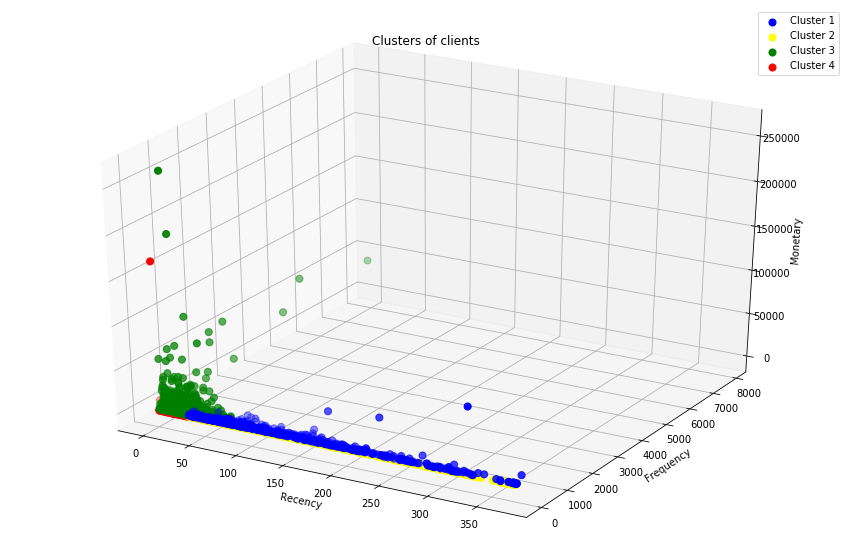

In [49]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red']

for i in range(0,4):
    dx.scatter(rfmTable[rfmTable.clusters == i].recency, 
               rfmTable[rfmTable.clusters == i].frequency, 
               rfmTable[rfmTable.clusters == i].monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

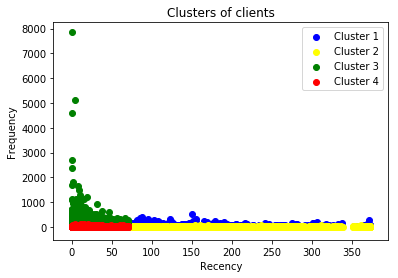

In [50]:
c1 = rfmTable[rfmTable.clusters == 0]
c2 = rfmTable[rfmTable.clusters == 1]
c3 = rfmTable[rfmTable.clusters == 2]
c4 = rfmTable[rfmTable.clusters == 3]

plt.scatter(c1.recency, c1.frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.recency, c2.frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.recency, c3.frequency, c = 'green', label = 'Cluster 3')
plt.scatter(c4.recency, c4.frequency, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

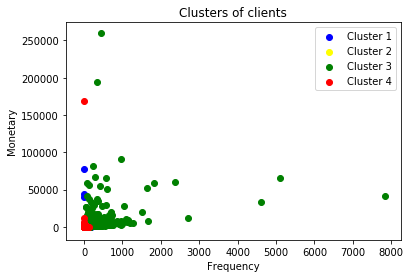

In [51]:
c1 = rfmTable[rfmTable.clusters == 0]
c2 = rfmTable[rfmTable.clusters == 1]
c3 = rfmTable[rfmTable.clusters == 2]
c4 = rfmTable[rfmTable.clusters == 3]

plt.scatter(c1.frequency, c1.monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.frequency, c2.monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.frequency, c3.monetary, c = 'green', label = 'Cluster 3')
plt.scatter(c4.frequency, c4.monetary, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()

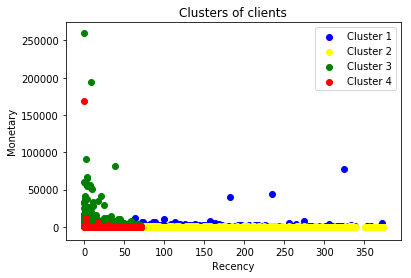

In [52]:
c1 = rfmTable[rfmTable.clusters == 0]
c2 = rfmTable[rfmTable.clusters == 1]
c3 = rfmTable[rfmTable.clusters == 2]
c4 = rfmTable[rfmTable.clusters == 3]

plt.scatter(c1.recency, c1.monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.recency, c2.monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.recency, c3.monetary, c = 'green', label = 'Cluster 3')
plt.scatter(c4.recency, c4.monetary, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()